In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import skewnorm, gamma, expon, uniform, bernoulli, binom, poisson

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
normal_data = stats.norm.rvs(size=1000, loc=0, scale=1)

normal_data = np.array(normal_data)

min(normal_data), max(normal_data)

(-3.640229463635595, 2.8535391596767608)

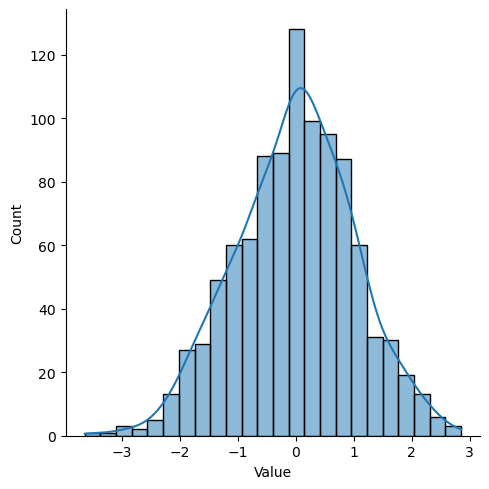

In [4]:
dataframe = pd.DataFrame(normal_data, columns=["Value"])

sns.displot(dataframe, x="Value", kde=True)

In [5]:
np.mean(normal_data), np.median(normal_data), stats.mode(normal_data), np.var(
    normal_data
), np.std(normal_data)

(-0.00970634412076571,
 0.03346587880587083,
 ModeResult(mode=-3.640229463635595, count=1),
 1.0422825814603998,
 1.020922416964384)

In [6]:
# Between mean and mean + std
a = normal_data >= np.mean(normal_data)

b = normal_data <= np.mean(normal_data) + np.std(normal_data)

np.sum(a & b)

382

In [7]:
# Between mean and mean - std
a = normal_data >= np.mean(normal_data) - np.std(normal_data)

b = normal_data <= np.mean(normal_data)

np.sum(a & b)

303

In [8]:
# Between mean - std and mean + std
a = normal_data >= np.mean(normal_data) - np.std(normal_data)

b = normal_data <= np.mean(normal_data) + np.std(normal_data)

np.sum(a & b)

685

In [9]:
699 / 1000

0.699

In [10]:
height_data = np.array(
    [
        126.0,
        129.5,
        133.0,
        133.0,
        136.5,
        136.5,
        140.0,
        140.0,
        140.0,
        140.0,
        143.5,
        143.5,
        143.5,
        143.5,
        143.5,
        143.5,
        147.0,
        147.0,
        147.0,
        147.0,
        147.0,
        147.0,
        147.0,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        171.5,
        171.5,
        171.5,
        171.5,
        171.5,
        171.5,
        171.5,
        175.0,
        175.0,
        175.0,
        175.0,
        175.0,
        175.0,
        178.5,
        178.5,
        178.5,
        178.5,
        182.0,
        182.0,
        185.5,
        185.5,
        189.0,
        192.5,
    ]
)

In [11]:
len(height_data), min(height_data), max(height_data), np.mean(height_data), np.median(
    height_data
), stats.mode(height_data), np.var(height_data), np.std(height_data), stats.variation(
    height_data
) * 100

(100,
 126.0,
 192.5,
 159.25,
 159.25,
 ModeResult(mode=157.5, count=10),
 186.3225,
 13.65,
 8.571428571428571)

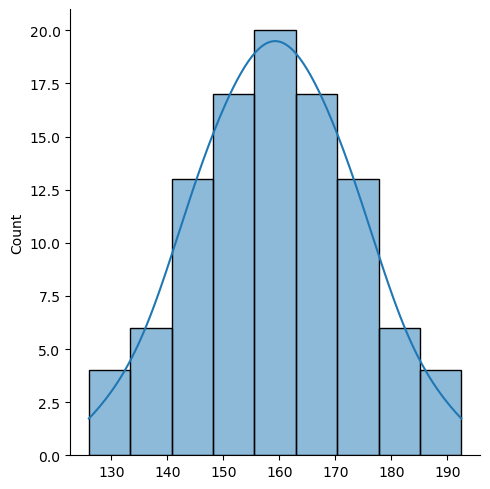

In [12]:
sns.displot(height_data, kde=True)

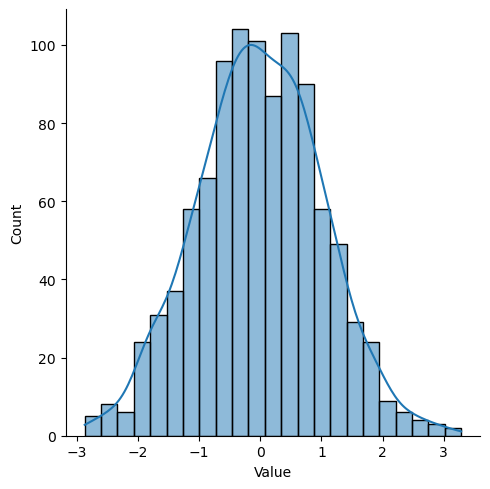

In [13]:
normal_data = skewnorm.rvs(a=0, loc=0, scale=1, size=1000)

dataframe = pd.DataFrame(normal_data, columns=["Value"])

sns.displot(dataframe, x="Value", kde=True)

In [14]:
np.mean(normal_data), np.median(normal_data), stats.mode(normal_data), np.var(
    normal_data
), np.std(normal_data)

(-0.012306406721164063,
 -0.01445572985151461,
 ModeResult(mode=-2.871900419066198, count=1),
 1.0414265015463575,
 1.02050306297745)

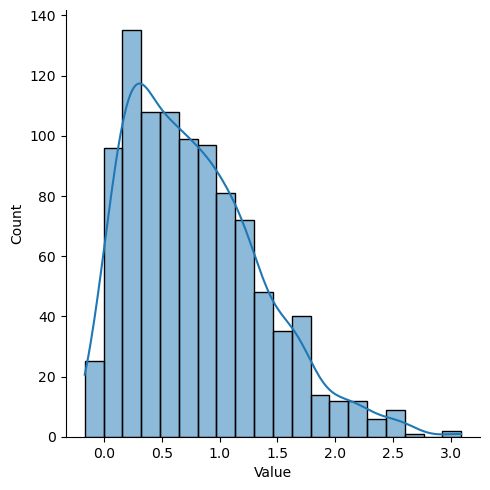

In [15]:
positive_data = skewnorm.rvs(a=10, loc=0, scale=1, size=1000)

dataframe = pd.DataFrame(positive_data, columns=["Value"])

sns.displot(dataframe, x="Value", kde=True)

In [16]:
np.mean(positive_data), np.median(positive_data), stats.mode(positive_data), np.var(
    positive_data
), np.std(positive_data)

(0.7854680067184177,
 0.6943266093684829,
 ModeResult(mode=-0.16924504597107456, count=1),
 0.3341722047254233,
 0.578076296629972)

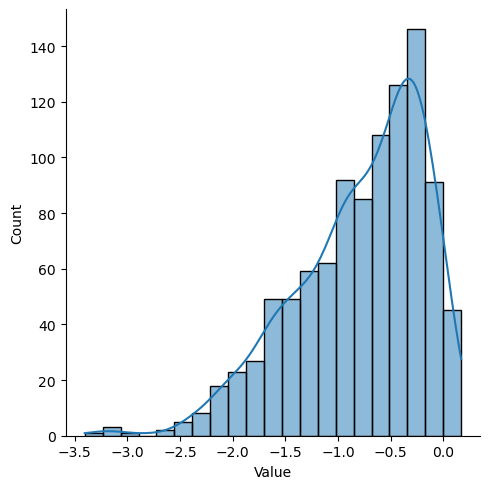

In [17]:
negative_data = skewnorm.rvs(a=-10, loc=0, scale=1, size=1000)

dataframe = pd.DataFrame(negative_data, columns=["Value"])

sns.displot(dataframe, x="Value", kde=True)

In [18]:
np.mean(negative_data), np.median(negative_data), stats.mode(negative_data), np.var(
    negative_data
), np.std(negative_data)

(-0.7856918001089622,
 -0.656580071440708,
 ModeResult(mode=-3.403072854558471, count=1),
 0.3754054848723898,
 0.6127034232582594)

#### Standardized normal distribution

In [19]:
standart_normal_data = np.random.normal(loc=0, scale=1, size=1000)

min(standart_normal_data), max(standart_normal_data)

(-3.33609260160789, 2.8768633050530363)

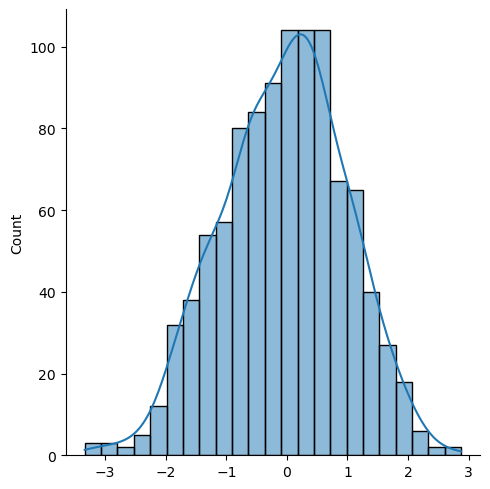

In [20]:
sns.displot(standart_normal_data, kde=True)

In [21]:
standart_normal_data.mean(), np.std(standart_normal_data),

(-0.04814159645225734, 1.0163390800560965)

In [22]:
mean_height = height_data.mean()

mean_height

159.25

In [23]:
std_height = height_data.std()

std_height

13.65

In [24]:
standart_height_data = (height_data - mean_height) / std_height

standart_height_data

array([-2.43589744, -2.17948718, -1.92307692, -1.92307692, -1.66666667,
       -1.66666667, -1.41025641, -1.41025641, -1.41025641, -1.41025641,
       -1.15384615, -1.15384615, -1.15384615, -1.15384615, -1.15384615,
       -1.15384615, -0.8974359 , -0.8974359 , -0.8974359 , -0.8974359 ,
       -0.8974359 , -0.8974359 , -0.8974359 , -0.64102564, -0.64102564,
       -0.64102564, -0.64102564, -0.64102564, -0.64102564, -0.64102564,
       -0.64102564, -0.38461538, -0.38461538, -0.38461538, -0.38461538,
       -0.38461538, -0.38461538, -0.38461538, -0.38461538, -0.38461538,
       -0.12820513, -0.12820513, -0.12820513, -0.12820513, -0.12820513,
       -0.12820513, -0.12820513, -0.12820513, -0.12820513, -0.12820513,
        0.12820513,  0.12820513,  0.12820513,  0.12820513,  0.12820513,
        0.12820513,  0.12820513,  0.12820513,  0.12820513,  0.12820513,
        0.38461538,  0.38461538,  0.38461538,  0.38461538,  0.38461538,
        0.38461538,  0.38461538,  0.38461538,  0.38461538,  0.64

In [25]:
standart_height_data.mean(), standart_height_data.std()

(0.0, 0.9999999999999999)

#### Central limit theorem

In [26]:
heights = np.random.randint(126, 192, 500)

heights.mean()

159.012

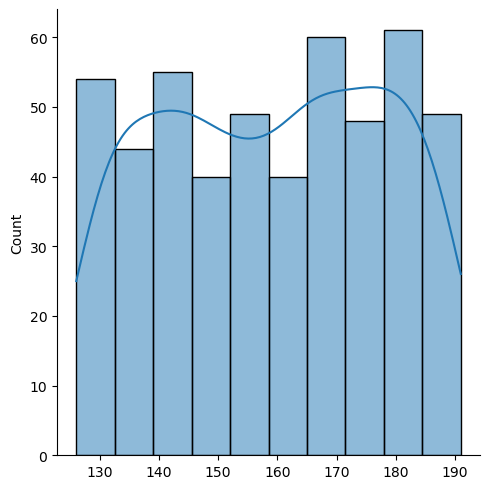

In [27]:
sns.displot(heights, kde=True)

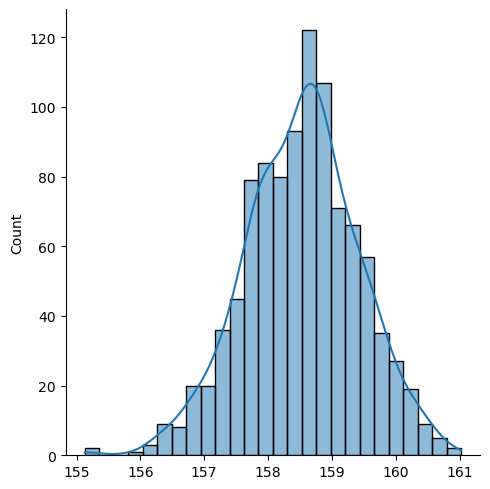

In [28]:
mean_height = np.array([np.random.randint(126, 192, 500).mean() for _ in range(1000)])

sns.displot(mean_height, kde=True)

#### Gamma distribution

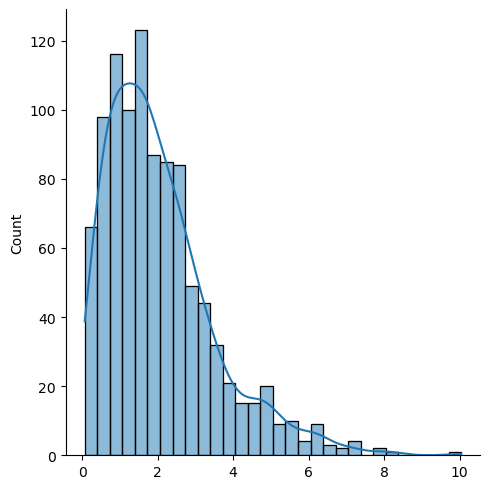

In [29]:
gamma_data = np.array(gamma.rvs(a=2, loc=0, scale=1, size=1000))

sns.displot(gamma_data, kde=True)

In [30]:
min(gamma_data), max(gamma_data)

(0.06715175830558057, 10.036945014839487)

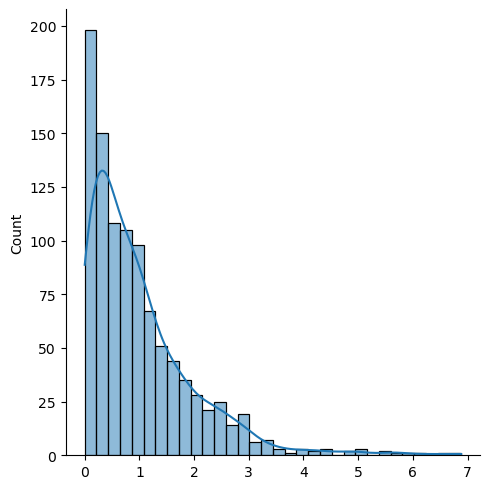

In [31]:
expon_data = np.array(expon.rvs(loc=0, scale=1, size=1000))

sns.displot(expon_data, kde=True)

In [32]:
min(expon_data), max(expon_data)

(0.00048647646593593026, 6.882824545139536)

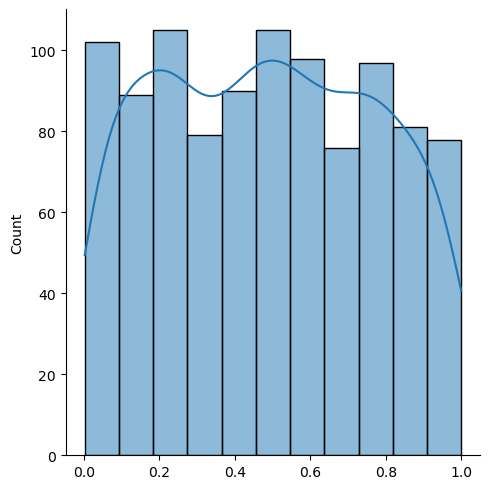

In [33]:
uniform_data = np.array(uniform.rvs(loc=0, scale=1, size=1000))

sns.displot(uniform_data, kde=True)

In [34]:
min(uniform_data), max(uniform_data)

(0.001758593518280116, 0.9999120421078628)

In [35]:
credit_data = pd.read_csv("data/credit_data.csv")

credit_data.dropna(inplace=True)

credit_data.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [36]:
X = credit_data[["income", "age", "loan"]]
y = credit_data["c#default"]

In [37]:
results_naive_bayes = []

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=i
    )

    naive_bayes = GaussianNB()

    naive_bayes.fit(X_train, y_train)

    y_pred = naive_bayes.predict(X_test)

    results_naive_bayes.append(accuracy_score(y_test, y_pred))


print(results_naive_bayes)

[0.9225, 0.9375, 0.915, 0.9275, 0.94, 0.9125, 0.945, 0.9325, 0.9225, 0.895, 0.9225, 0.93, 0.925, 0.9275, 0.915, 0.92, 0.92, 0.94, 0.925, 0.9325, 0.9, 0.935, 0.9225, 0.925, 0.915, 0.9225, 0.92, 0.9325, 0.9275, 0.93]


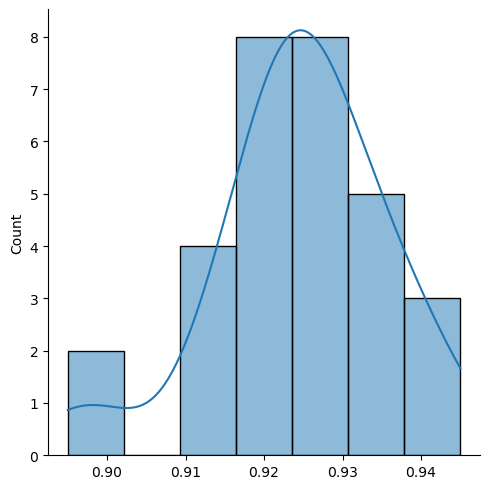

In [38]:
sns.displot(results_naive_bayes, kde=True)

In [39]:
data_bernoulli = np.array(bernoulli.rvs(size=1000, p=0.6))

np.unique(data_bernoulli, return_counts=True)

(array([0, 1]), array([402, 598]))

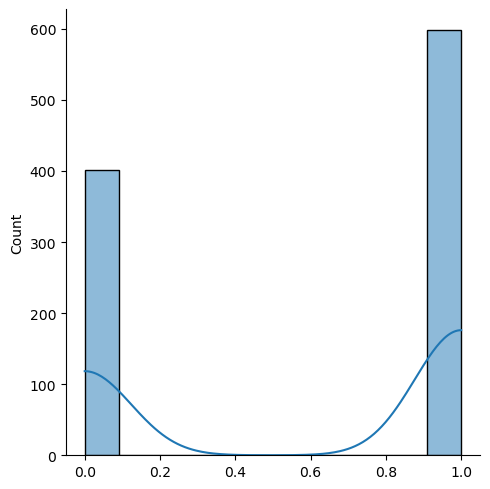

In [40]:
sns.displot(data_bernoulli, kde=True)

In [41]:
data_binom = np.array(binom.rvs(n=10, p=0.7, size=1000))

np.unique(data_binom, return_counts=True)

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([  1,  12,  28, 126, 176, 290, 225, 108,  34]))

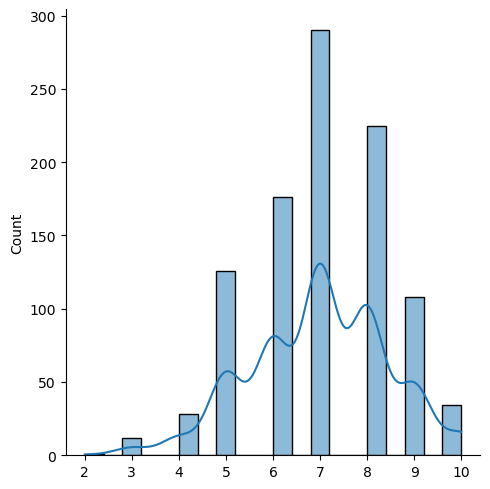

In [42]:
sns.displot(data_binom, kde=True)

In [43]:
data_poisson = np.array(poisson.rvs(mu=1, size=1000))

min(data_poisson), max(data_poisson)

(0, 5)

In [44]:
np.unique(data_poisson, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([339, 393, 188,  66,  13,   1]))

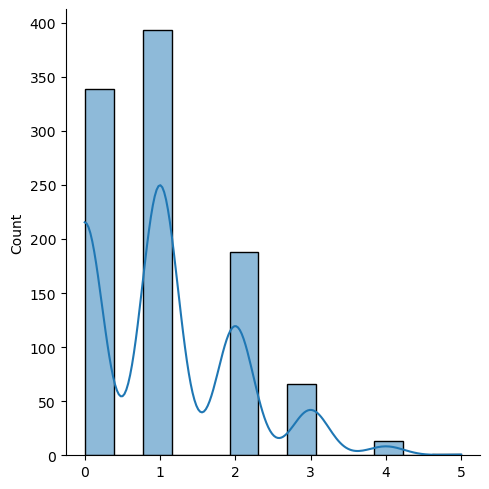

In [45]:
sns.displot(data_poisson, kde=True)

#### Exercise

In [46]:
census_data = pd.read_csv("data/census.csv")

census_data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


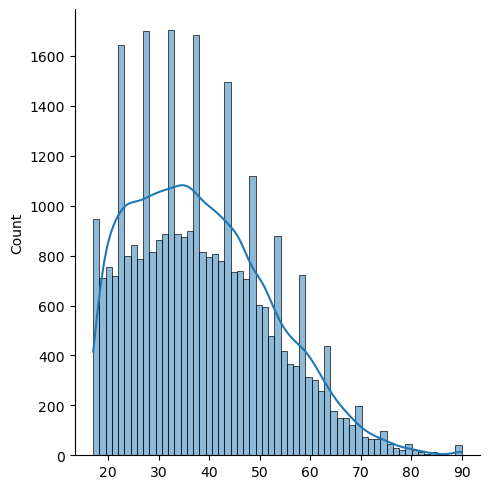

In [47]:
census_age = np.array(census_data["age"])

sns.displot(census_age, kde=True)

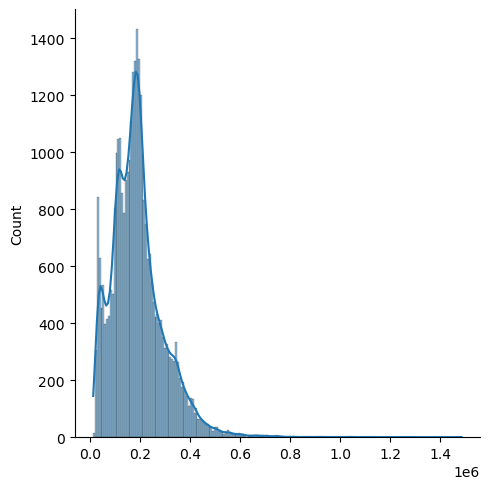

In [48]:
census_final_weight = np.array(census_data["final-weight"])

sns.displot(census_final_weight, kde=True)

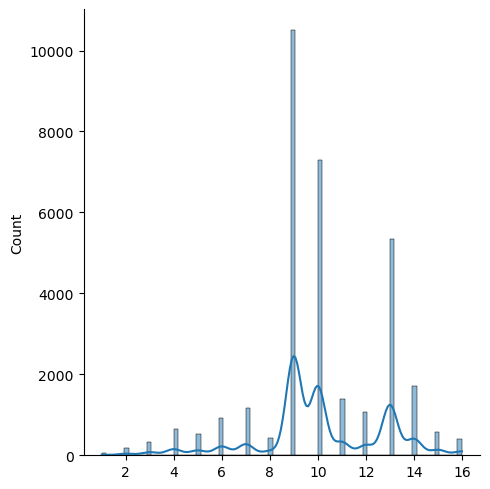

In [49]:
census_education_num = np.array(census_data["education-num"])

sns.displot(census_education_num, kde=True)

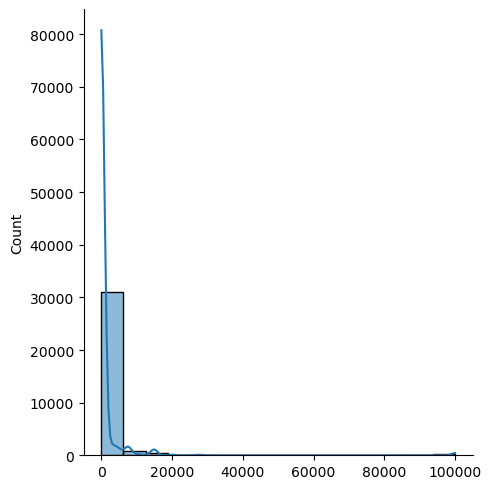

In [50]:
census_capital_gain = np.array(census_data["capital-gain"])

sns.displot(census_capital_gain, kde=True)

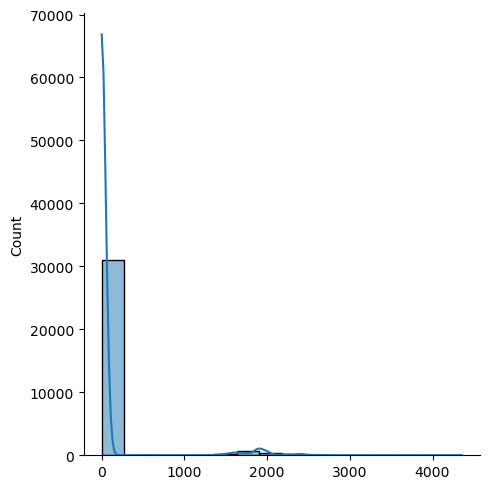

In [51]:
census_capital_loos = np.array(census_data["capital-loos"])

sns.displot(census_capital_loos, kde=True)

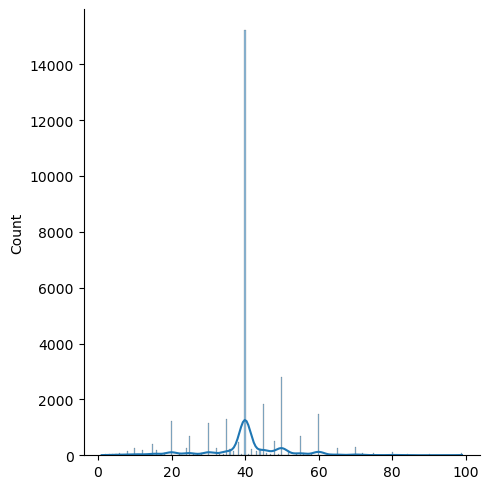

In [52]:
census_hour_per_week = np.array(census_data["hour-per-week"])

sns.displot(census_hour_per_week, kde=True)

<Axes: xlabel='count'>

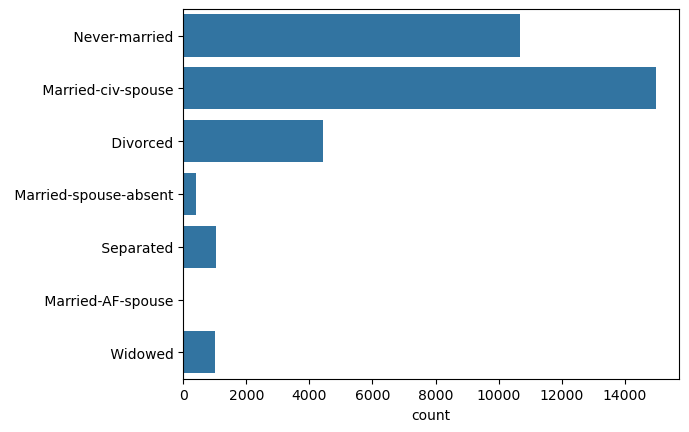

In [53]:
census_marital_status = np.array(census_data["marital-status"])

sns.countplot(census_marital_status)

<Axes: xlabel='count'>

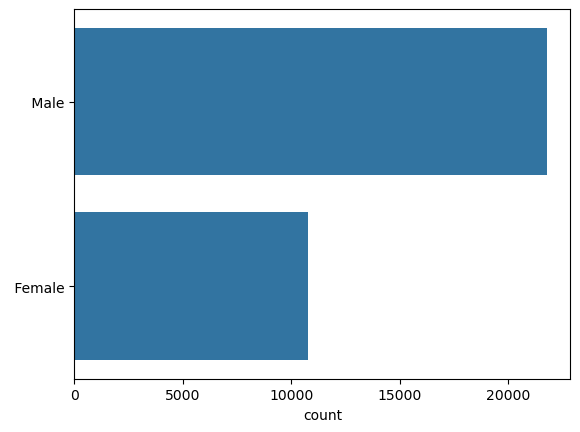

In [54]:
census_sex = np.array(census_data['sex'])

sns.countplot(census_sex)

<Axes: xlabel='count'>

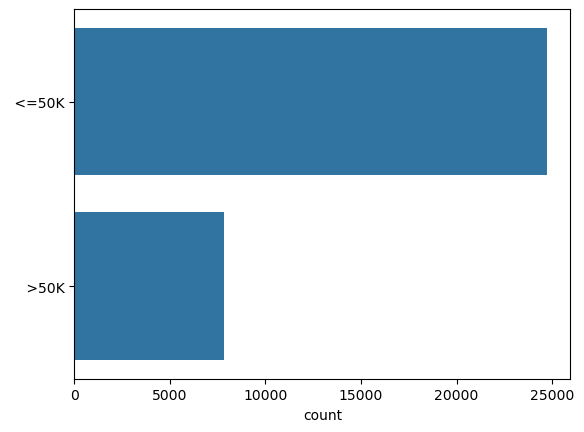

In [55]:
census_income = np.array(census_data['income'])

sns.countplot(census_income)

In [58]:
credit_data = pd.read_csv("data/credit_data.csv")

credit_data.dropna(inplace=True)

credit_data.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


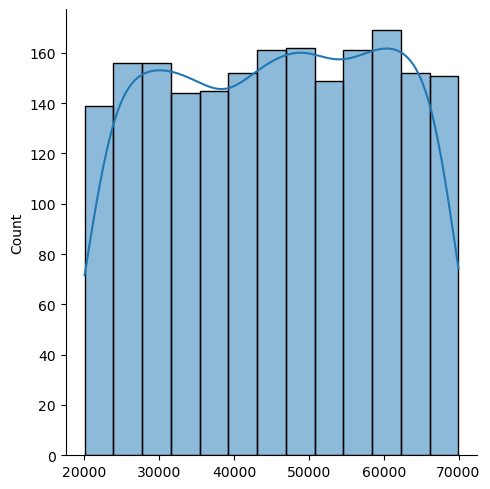

In [60]:
credit_income = np.array(credit_data["income"])

sns.displot(credit_income, kde=True)

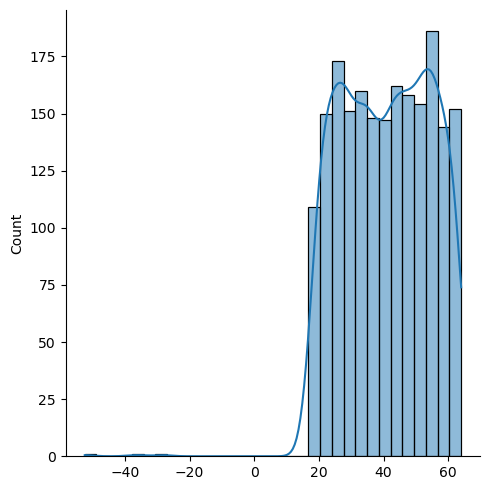

In [59]:
credit_age = np.array(credit_data["age"])

sns.displot(credit_age, kde=True)

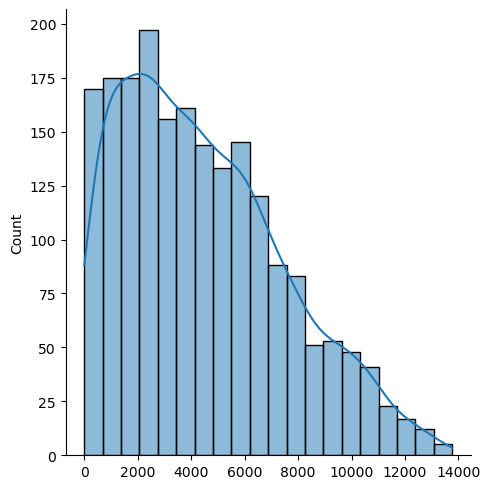

In [61]:
credit_load = np.array(credit_data["loan"])

sns.displot(credit_load, kde=True)

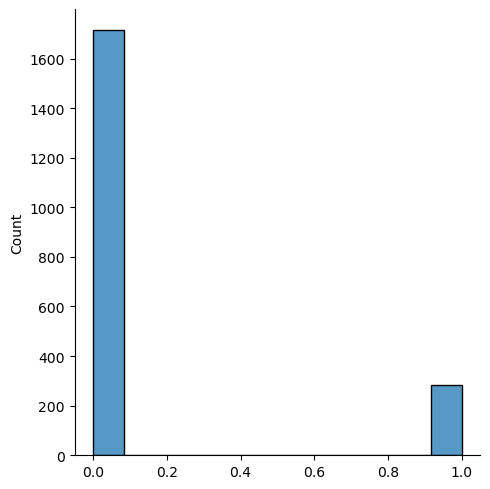

In [63]:
credit_c_defult = np.array(credit_data["c#default"])

sns.displot(credit_c_defult)